In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from torch.utils.data import DataLoader, Dataset
import pandas as pd


# Data Preparation

Extracting descriptions, generating descriptions of different token sub-categories. Saving the prepared data as csv.

In [161]:
# df = pd.read_csv('matched_distinct.csv')

# df

In [ ]:
# df.columns

Index(['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'track_id', 'artists',
       'album_name', 'track_name', 'popularity', 'duration_ms', 'explicit',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature', 'track_genre', 'msd_track_id'],
      dtype='object')

In [ ]:
# df_selected = df[['msd_track_id', 'danceability', 'energy', 'key', 'loudness', 'mode', 'acousticness', 'instrumentalness', 'valence', 'tempo', 'time_signature']]

In [ ]:
# !pwd && unzip -qq ./results.zip -y

In [2]:
max_description_length = 322

In [ ]:
# import glob
# import json
# import pickle
# import ast


# def preprocess_bars(description):
#   bar_count = 0
#   result = []
#   for t in description:
#     if 'Bar' in t:
#       bar_count += 1
#       t = f"Bar_{bar_count}"
#     result.append(t)
#   return result

# descriptions = []
# max_description_length = 0
# description_lengths = []
# for file_path in glob.glob('results/segments/*.json'):
#   file_name = file_path.split('/')[-1]
#   with open(file_path, mode='r') as f:
#     description = ast.literal_eval(f.read())
#   track_id = file_name.split('_')[0]
#   # if len(description) < 113:
#   #   continue
#   # description = description[:113]
#   description = preprocess_bars(description)
#   descriptions.append((track_id, description))
#   max_description_length = max(max_description_length, len(description))
#   description_lengths.append(len(description))
#   # descriptions.append((track_id, " ".join(description)))

# print("Max description length", max_description_length)

# df2 = pd.DataFrame(descriptions, columns=('msd_track_id', 'description'))

# df2

Max description length 322


,msd_track_id,description
0,TRPOFFD128E07929A7,"[Bar_1, Time Signature_4/4, Note Density_6, Me..."
1,TRSWDMX12903CFC84B,"[Bar_1, Time Signature_4/4, Note Density_1, Me..."
2,TRUOGAU128E0780EFD,"[Bar_1, Time Signature_4/4, Note Density_3, Me..."
3,TRGGUQF128F932FB97,"[Bar_1, Time Signature_4/4, Note Density_3, Me..."
4,TRKGVWI128F92EB746,"[Bar_1, Time Signature_6/8, Note Density_1, Me..."
...,...,...
7090,TRWCEXC128F426305D,"[Bar_1, Time Signature_4/4, Note Density_2, Me..."
7091,TRKJOVO128F421C79F,"[Bar_1, Time Signature_4/4, Note Density_6, Me..."
7092,TRWAGEJ128E07930BE,"[Bar_1, Time Signature_4/4, Note Density_4, Me..."
7093,TRPERBJ128F933D93C,"[Bar_1, Time Signature_4/4, Note Density_4, Me..."


In [ ]:
# Q1 = np.percentile(description_lengths, 10)
# Q3 = np.percentile(description_lengths, 90)

# print(Q1, Q3)

113.0 184.0


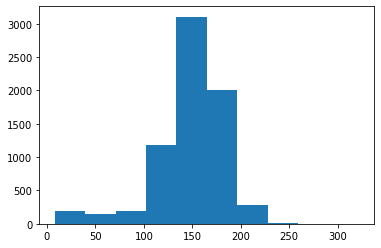

In [ ]:
# import matplotlib.pyplot as plt
# plt.hist(description_lengths)
# plt.show()

In [ ]:
# df_merged = pd.merge(df2, df_selected, how='left', on='msd_track_id')

# df_merged

,msd_track_id,description,danceability,energy,key,loudness,mode,acousticness,instrumentalness,valence,tempo,time_signature
0,TRPOFFD128E07929A7,"[Bar_1, Time Signature_4/4, Note Density_6, Me...",0.287,0.780,7,-6.493,1,0.049000,0.000037,0.383,167.278,4
1,TRSWDMX12903CFC84B,"[Bar_1, Time Signature_4/4, Note Density_1, Me...",0.348,0.418,10,-8.860,1,0.536000,0.000000,0.295,145.891,4
2,TRSWDMX12903CFC84B,"[Bar_1, Time Signature_4/4, Note Density_1, Me...",0.637,0.387,0,-6.271,1,0.757000,0.000000,0.881,83.271,4
3,TRSWDMX12903CFC84B,"[Bar_1, Time Signature_4/4, Note Density_1, Me...",0.445,0.291,0,-15.371,1,0.654000,0.001710,0.432,136.405,4
4,TRUOGAU128E0780EFD,"[Bar_1, Time Signature_4/4, Note Density_3, Me...",0.410,0.959,9,-4.563,1,0.000324,0.000000,0.830,193.155,4
...,...,...,...,...,...,...,...,...,...,...,...,...
10737,TRNRKLE128F930F8FB,"[Bar_1, Time Signature_4/4, Note Density_4, Me...",0.752,0.538,11,-13.293,1,0.062900,0.000088,0.752,123.028,4
10738,TRNRKLE128F930F8FB,"[Bar_1, Time Signature_4/4, Note Density_4, Me...",0.751,0.538,11,-13.318,1,0.063900,0.000101,0.753,123.028,4
10739,TRNRKLE128F930F8FB,"[Bar_1, Time Signature_4/4, Note Density_4, Me...",0.752,0.538,11,-13.293,1,0.062900,0.000088,0.752,123.028,4
10740,TRNRKLE128F930F8FB,"[Bar_1, Time Signature_4/4, Note Density_4, Me...",0.752,0.538,11,-13.293,1,0.062900,0.000088,0.752,123.028,4


In [ ]:
# def extract_token_class(row, token_class):
#   filtered_description = [
#       token
#       for token in row['description']
#       if token_class in token
#   ]
#   return filtered_description

# def extract_categorical_tokens(row):
#   filtered_description = [
#       token
#       for token in row['description']
#       if "Chord" in token or "Instrument" in token or "Time" in token or "Bar" in token
#   ]
#   return filtered_description

In [ ]:
# df_merged['pitch_description'] = df_merged.apply(lambda row: extract_token_class(row, 'Mean Pitch'), axis=1)
# df_merged['velocity_description'] = df_merged.apply(lambda row: extract_token_class(row, 'Mean Velocity'), axis=1)
# df_merged['density_description'] = df_merged.apply(lambda row: extract_token_class(row, 'Density'), axis=1)
# df_merged['duration_description'] = df_merged.apply(lambda row: extract_token_class(row, 'Mean Duration'), axis=1)
# df_merged['categorical_description'] = df_merged.apply(extract_categorical_tokens, axis=1)
# df_merged

,msd_track_id,description,danceability,energy,key,loudness,mode,acousticness,instrumentalness,valence,tempo,time_signature,pitch_description,velocity_description,density_description,duration_description,categorical_description
0,TRPOFFD128E07929A7,"[Bar_1, Time Signature_4/4, Note Density_6, Me...",0.287,0.780,7,-6.493,1,0.049000,0.000037,0.383,167.278,4,"[Mean Pitch_13, Mean Pitch_13, Mean Pitch_13, ...","[Mean Velocity_18, Mean Velocity_18, Mean Velo...","[Note Density_6, Note Density_6, Note Density_...","[Mean Duration_32, Mean Duration_32, Mean Dura...","[Bar_1, Time Signature_4/4, Instrument_Alto Sa..."
1,TRSWDMX12903CFC84B,"[Bar_1, Time Signature_4/4, Note Density_1, Me...",0.348,0.418,10,-8.860,1,0.536000,0.000000,0.295,145.891,4,"[Mean Pitch_12, Mean Pitch_14, Mean Pitch_15, ...","[Mean Velocity_25, Mean Velocity_17, Mean Velo...","[Note Density_1, Note Density_0, Note Density_...","[Mean Duration_30, Mean Duration_32, Mean Dura...","[Bar_1, Time Signature_4/4, Instrument_Electri..."
2,TRSWDMX12903CFC84B,"[Bar_1, Time Signature_4/4, Note Density_1, Me...",0.637,0.387,0,-6.271,1,0.757000,0.000000,0.881,83.271,4,"[Mean Pitch_12, Mean Pitch_14, Mean Pitch_15, ...","[Mean Velocity_25, Mean Velocity_17, Mean Velo...","[Note Density_1, Note Density_0, Note Density_...","[Mean Duration_30, Mean Duration_32, Mean Dura...","[Bar_1, Time Signature_4/4, Instrument_Electri..."
3,TRSWDMX12903CFC84B,"[Bar_1, Time Signature_4/4, Note Density_1, Me...",0.445,0.291,0,-15.371,1,0.654000,0.001710,0.432,136.405,4,"[Mean Pitch_12, Mean Pitch_14, Mean Pitch_15, ...","[Mean Velocity_25, Mean Velocity_17, Mean Velo...","[Note Density_1, Note Density_0, Note Density_...","[Mean Duration_30, Mean Duration_32, Mean Dura...","[Bar_1, Time Signature_4/4, Instrument_Electri..."
4,TRUOGAU128E0780EFD,"[Bar_1, Time Signature_4/4, Note Density_3, Me...",0.410,0.959,9,-4.563,1,0.000324,0.000000,0.830,193.155,4,"[Mean Pitch_13, Mean Pitch_13, Mean Pitch_12, ...","[Mean Velocity_26, Mean Velocity_26, Mean Velo...","[Note Density_3, Note Density_3, Note Density_...","[Mean Duration_32, Mean Duration_32, Mean Dura...","[Bar_1, Time Signature_4/4, Instrument_Electri..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10737,TRNRKLE128F930F8FB,"[Bar_1, Time Signature_4/4, Note Density_4, Me...",0.752,0.538,11,-13.293,1,0.062900,0.000088,0.752,123.028,4,"[Mean Pitch_14, Mean Pitch_14, Mean Pitch_14, ...","[Mean Velocity_27, Mean Velocity_27, Mean Velo...","[Note Density_4, Note Density_4, Note Density_...","[Mean Duration_32, Mean Duration_32, Mean Dura...","[Bar_1, Time Signature_4/4, Instrument_Electri..."
10738,TRNRKLE128F930F8FB,"[Bar_1, Time Signature_4/4, Note Density_4, Me...",0.751,0.538,11,-13.318,1,0.063900,0.000101,0.753,123.028,4,"[Mean Pitch_14, Mean Pitch_14, Mean Pitch_14, ...","[Mean Velocity_27, Mean Velocity_27, Mean Velo...","[Note Density_4, Note Density_4, Note Density_...","[Mean Duration_32, Mean Duration_32, Mean Dura...","[Bar_1, Time Signature_4/4, Instrument_Electri..."
10739,TRNRKLE128F930F8FB,"[Bar_1, Time Signature_4/4, Note Density_4, Me...",0.752,0.538,11,-13.293,1,0.062900,0.000088,0.752,123.028,4,"[Mean Pitch_14, Mean Pitch_14, Mean Pitch_14, ...","[Mean Velocity_27, Mean Velocity_27, Mean Velo...","[Note Density_4, Note Density_4, Note Density_...","[Mean Duration_32, Mean Duration_32, Mean Dura...","[Bar_1, Time Signature_4/4, Instrument_Electri..."
10740,TRNRKLE128F930F8FB,"[Bar_1, Time Signature_4/4, Note Density_4, Me...",0.752,0.538,11,-13.293,1,0.062900,0.000088,0.752,123.028,4,"[Mean Pitch_14, Mean Pitch_14, Mean Pitch_14, ...","[Mean Velocity_27, Mean Velocity_27, Mean Velo...","[Note Density_4, Note Density_4, Note Density_...","[Mean Duration_32, Mean Duration_32, Mean Dura...","[Bar_1, Time Signature_4/4, Instrument_Electri..."


# Data Loading

Loading into a torch dataset with the option for soft labels.

In [2]:
df_merged = pd.read_csv("processed_dataset.csv")

df_merged

,Unnamed: 0,msd_track_id,description,danceability,energy,key,loudness,mode,acousticness,instrumentalness,valence,tempo,time_signature,pitch_description,velocity_description,density_description,duration_description,categorical_description
0,0,TRPOFFD128E07929A7,"['Bar_1', 'Time Signature_4/4', 'Note Density_...",0.287,0.780,7,-6.493,1,0.049000,0.000037,0.383,167.278,4,"['Mean Pitch_13', 'Mean Pitch_13', 'Mean Pitch...","['Mean Velocity_18', 'Mean Velocity_18', 'Mean...","['Note Density_6', 'Note Density_6', 'Note Den...","['Mean Duration_32', 'Mean Duration_32', 'Mean...","['Bar_1', 'Time Signature_4/4', 'Instrument_Al..."
1,1,TRSWDMX12903CFC84B,"['Bar_1', 'Time Signature_4/4', 'Note Density_...",0.348,0.418,10,-8.860,1,0.536000,0.000000,0.295,145.891,4,"['Mean Pitch_12', 'Mean Pitch_14', 'Mean Pitch...","['Mean Velocity_25', 'Mean Velocity_17', 'Mean...","['Note Density_1', 'Note Density_0', 'Note Den...","['Mean Duration_30', 'Mean Duration_32', 'Mean...","['Bar_1', 'Time Signature_4/4', 'Instrument_El..."
2,2,TRSWDMX12903CFC84B,"['Bar_1', 'Time Signature_4/4', 'Note Density_...",0.637,0.387,0,-6.271,1,0.757000,0.000000,0.881,83.271,4,"['Mean Pitch_12', 'Mean Pitch_14', 'Mean Pitch...","['Mean Velocity_25', 'Mean Velocity_17', 'Mean...","['Note Density_1', 'Note Density_0', 'Note Den...","['Mean Duration_30', 'Mean Duration_32', 'Mean...","['Bar_1', 'Time Signature_4/4', 'Instrument_El..."
3,3,TRSWDMX12903CFC84B,"['Bar_1', 'Time Signature_4/4', 'Note Density_...",0.445,0.291,0,-15.371,1,0.654000,0.001710,0.432,136.405,4,"['Mean Pitch_12', 'Mean Pitch_14', 'Mean Pitch...","['Mean Velocity_25', 'Mean Velocity_17', 'Mean...","['Note Density_1', 'Note Density_0', 'Note Den...","['Mean Duration_30', 'Mean Duration_32', 'Mean...","['Bar_1', 'Time Signature_4/4', 'Instrument_El..."
4,4,TRUOGAU128E0780EFD,"['Bar_1', 'Time Signature_4/4', 'Note Density_...",0.410,0.959,9,-4.563,1,0.000324,0.000000,0.830,193.155,4,"['Mean Pitch_13', 'Mean Pitch_13', 'Mean Pitch...","['Mean Velocity_26', 'Mean Velocity_26', 'Mean...","['Note Density_3', 'Note Density_3', 'Note Den...","['Mean Duration_32', 'Mean Duration_32', 'Mean...","['Bar_1', 'Time Signature_4/4', 'Instrument_El..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10737,10737,TRNRKLE128F930F8FB,"['Bar_1', 'Time Signature_4/4', 'Note Density_...",0.752,0.538,11,-13.293,1,0.062900,0.000088,0.752,123.028,4,"['Mean Pitch_14', 'Mean Pitch_14', 'Mean Pitch...","['Mean Velocity_27', 'Mean Velocity_27', 'Mean...","['Note Density_4', 'Note Density_4', 'Note Den...","['Mean Duration_32', 'Mean Duration_32', 'Mean...","['Bar_1', 'Time Signature_4/4', 'Instrument_El..."
10738,10738,TRNRKLE128F930F8FB,"['Bar_1', 'Time Signature_4/4', 'Note Density_...",0.751,0.538,11,-13.318,1,0.063900,0.000101,0.753,123.028,4,"['Mean Pitch_14', 'Mean Pitch_14', 'Mean Pitch...","['Mean Velocity_27', 'Mean Velocity_27', 'Mean...","['Note Density_4', 'Note Density_4', 'Note Den...","['Mean Duration_32', 'Mean Duration_32', 'Mean...","['Bar_1', 'Time Signature_4/4', 'Instrument_El..."
10739,10739,TRNRKLE128F930F8FB,"['Bar_1', 'Time Signature_4/4', 'Note Density_...",0.752,0.538,11,-13.293,1,0.062900,0.000088,0.752,123.028,4,"['Mean Pitch_14', 'Mean Pitch_14', 'Mean Pitch...","['Mean Velocity_27', 'Mean Velocity_27', 'Mean...","['Note Density_4', 'Note Density_4', 'Note Den...","['Mean Duration_32', 'Mean Duration_32', 'Mean...","['Bar_1', 'Time Signature_4/4', 'Instrument_El..."
10740,10740,TRNRKLE128F930F8FB,"['Bar_1', 'Time Signature_4/4', 'Note Density_...",0.752,0.538,11,-13.293,1,0.062900,0.000088,0.752,123.028,4,"['Mean Pitch_14', 'Mean Pitch_14', 'Mean Pitch...","['Mean Velocity_27', 'Mean Velocity_27', 'Mean...","['Note Density_4', 'Note Density_4', 'Note Den...","['Mean Duration_32', 'Mean Duration_32', 'Mean...","['Bar_1', 'Time Signature_4/4', 'Instrument_El..."


In [3]:
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

device

device(type='cuda')

In [5]:
MUSIC_FEATURES = ['danceability', 'energy', 'key',
                  'loudness', 'mode', 'acousticness',
                  'instrumentalness', 'valence',
                  'tempo', 'time_signature']

import ast
import torch.nn.functional as F
from functools import cache

# Data preparation
class MusicDataset(Dataset):
    def __init__(self, dataframe, description_column, numerical_feature=False, soft_labels=False):
        features = []
        for i in range(len(dataframe.index)):
          row = []
          for feature_name in MUSIC_FEATURES:
            row.append(dataframe.iloc[i][feature_name])
          features.append(row)
        self.features = features
        self.descriptions = [ast.literal_eval(x) for x in dataframe[description_column].values]
        self.numerical = numerical_feature
        self.max_description_length = max([len(x) for x in self.descriptions])
        self.soft_labels = soft_labels

        print(f"Max length for {description_column}", self.max_description_length)

        if not self.numerical:
          token_list = set(token for desc in self.descriptions for token in desc)
          if self.soft_labels:
            token_list = sorted(token_list, key=lambda x: int(x.split("_")[-1]))
          print(token_list)
          self.vocab = {token: i for i, token in enumerate(token_list, start=1)}
          self.vocab['<PAD>'] = 0  # Add a padding token

          print(f"Vocab size for {description_column}", len(self.vocab))

    def __len__(self):
        return len(self.descriptions)

    @cache
    def __getitem__(self, idx):
        feature = torch.tensor(self.features[idx], dtype=torch.float32)
        if self.numerical:
          description = [int(x.split('_')[-1]) for x in self.descriptions[idx]]
        else:
          description = [self.vocab[token] for token in self.descriptions[idx]]
        # print("Des", self.descriptions[idx][:15])
        # print("Len", len(description))
        description_tensor = torch.tensor(description + [0]*(self.max_description_length - len(description)), dtype=torch.long)
        # print("Description shape", description_tensor.shape)
        if self.soft_labels:
          description_tensor_soft = self.create_soft_labels(description_tensor, len(self.vocab))
        else:
          description_tensor_soft = torch.zeros(1)
        return feature.to(device), description_tensor.to(device), description_tensor_soft.to(device)

    def create_soft_labels(self, targets, num_classes, smoothing=0.5):
        """
        Creates soft labels using a Gaussian distribution centered at each target label.
        :param targets: tensor of shape [batch_size, seq_length] with integer class labels.
        :param num_classes: total number of classes.
        :param smoothing: controls the spread of the distribution around the class label.
        :return: tensor of shape [batch_size, seq_length, num_classes] with soft labels.
        """
        soft_labels = torch.zeros(targets.shape[0], num_classes, device=targets.device)

        # Create a Gaussian distribution centered at each target label
        for s in range(targets.shape[0]):
            label = targets[s]
            soft_labels[s, max(0, label - 1):min(num_classes, label + 2)] = torch.tensor(
                [smoothing / 2 if i == label - 1 or i == label + 1 else 1.0 - smoothing if i == label else 0 for i in range(max(0, label - 1), min(num_classes, label + 2))],
                device=targets.device
            )

        # Normalize to ensure it's a valid probability distribution
        soft_labels = F.normalize(soft_labels, p=1, dim=1)
        return soft_labels


# Transformer Decoder

In [6]:
full_dataset = MusicDataset(df_merged, 'description', numerical_feature=False)

Max length for description 322
{'Instrument_Slap Bass 1', 'Chord_A:aug', 'Instrument_Reed Organ', 'Time Signature_12/8', 'Chord_B:dim', 'Mean Duration_23', 'Mean Velocity_16', 'Instrument_Electric Guitar (clean)', 'Chord_C:min', 'Mean Velocity_15', 'Mean Velocity_28', 'Instrument_Guitar Harmonics', 'Instrument_String Ensemble 2', 'Instrument_FX 6 (goblins)', 'Mean Pitch_31', 'Mean Pitch_17', 'Time Signature_6/4', 'Chord_D#:min7', 'Note Density_7', 'Bar_24', 'Chord_C:aug', 'Mean Velocity_0', 'Mean Duration_22', 'Mean Velocity_11', 'Mean Velocity_17', 'Mean Duration_21', 'Instrument_FX 5 (brightness)', 'Instrument_Tinkle Bell', 'Note Density_11', 'Chord_C#:None', 'Chord_D:min7', 'Instrument_Brass Section', 'Chord_G:dim', 'Instrument_Electric Bass (finger)', 'Instrument_Applause', 'Instrument_Church Organ', 'Mean Velocity_25', 'Chord_C#:maj', 'Instrument_Honky-tonk Piano', 'Instrument_Acoustic Guitar (nylon)', 'Chord_C:None', 'Mean Pitch_16', 'Chord_G:aug', 'Instrument_Banjo', 'Instrument

In [7]:
# torch.cuda.empty_cache()
# del model

In [12]:
from torch.utils.data import random_split

loader = DataLoader(full_dataset, batch_size=32, shuffle=True)

total_size = len(full_dataset)
train_size = int(0.9 * total_size)
test_size = total_size - train_size

# Split the dataset
train_dataset, test_dataset = random_split(full_dataset, [train_size, test_size], generator=torch.Generator().manual_seed(42))

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)

# Model configuration
d_model = 16  # Model dimensionality
nhead = 8      # Number of heads in multi-head attention
num_layers = 4 # Number of transformer layers
vocab_size = len(full_dataset.vocab) # Vocabulary size

class CustomTransformer(nn.Module):
    def __init__(self, vocab_size=vocab_size):
        super().__init__()
        self.feature_embedding = nn.Linear(10, d_model)  # Assuming 10 numerical features
        self.token_embedding = nn.Embedding(vocab_size, d_model, padding_idx=full_dataset.vocab['<PAD>'])
        self.positional_encoding = nn.Parameter(torch.zeros(1, 512, d_model)) # Example positional encoding, adjust size as needed
        self.decoder = nn.TransformerDecoder(
            nn.TransformerDecoderLayer(d_model=d_model, nhead=nhead),
            num_layers=num_layers
        )
        self.output_layer = nn.Linear(d_model, vocab_size)

    def forward(self, src, tgt):
        src = self.feature_embedding(src).unsqueeze(1) # Transform feature to match input embedding size
        tgt = self.token_embedding(tgt) + self.positional_encoding[:,:tgt.size(1),:] # Add positional encoding
        output = self.decoder(tgt, src.repeat(1, tgt.size(1), 1))
        logits = self.output_layer(output)
        return logits

In [9]:
def accuracy(output, target):
    """
    Computes the accuracy of the model.

    Parameters:
        output (torch.Tensor): The logits or probabilities output by the model.
                              Shape should be [batch_size, num_classes] for classification tasks.
        target (torch.Tensor): The actual labels. Shape should be [batch_size].

    Returns:
        float: The accuracy of the model as a percentage.
    """
    # Convert outputs to predicted class by taking the index of the highest probability.
    # Assumes that the class with the highest probability is the model's prediction.
    _, predicted = torch.max(output, dim=1)

    # Check how many predictions were correct by comparing with the target labels.
    correct = (predicted == target).sum().item()  # `.item()` converts a tensor of size 1 to a plain Python scalar.

    # Calculate the accuracy percentage.
    total = target.size(0)
    accuracy = 100 * correct / total
    return accuracy

In [13]:
import datetime
import json
# Initialize model
model = CustomTransformer().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

def evaluate(model, loader):
  with torch.no_grad():
    accuracies = []
    for feature, description, _ in loader:
          input_tgt = description[:, :-1]
          logits = model(feature, input_tgt)
          acc = accuracy(logits.reshape(-1, logits.shape[-1]), description[:, 1:].reshape(-1))
          accuracies.append(acc)
  return np.mean(accuracies)

metrics = {
    "loss": [],
    "acc": []
}
# Training loop
for epoch in range(100):
    print("Epoch", epoch+1)
    epoch_losses = []
    epoch_acc = []
    start = datetime.datetime.utcnow()
    loss_fn = nn.CrossEntropyLoss()
    for feature, description, _ in train_loader:
        optimizer.zero_grad()
        # Prepare shifted target input and labels for training
        # input_tgt = torch.cat([torch.full((description.shape[0], 1), full_dataset.vocab['<PAD>'], dtype=torch.long), description[:, :-1].cpu()], dim=1).to(device)
        input_tgt = description[:, :-1]
        logits = model(feature, input_tgt)
        loss = loss_fn(logits.permute(0, 2, 1), description[:, 1:])
        # acc = accuracy(logits.reshape(-1, logits.shape[-1]), description[:, 1:].reshape(-1))
        # epoch_acc.append(acc)
        loss.backward()
        optimizer.step()
        epoch_losses.append(loss.item())
        # print(f'Epoch {epoch}, Loss: {loss.item()}')
    if epoch % 10 == 0:
      acc = evaluate(model, test_loader)
      print(f"--> Average acc {acc:.2f}")
      metrics['acc'].append(acc)

    print(f"Average loss {np.mean(epoch_losses):.2f}")
    print(f"Seconds per epoch", (datetime.datetime.utcnow() - start).total_seconds())
    metrics['loss'] += epoch_losses
    metrics['acc'] += epoch_acc

torch.save(model, "transformer.pt")
with open("transformer.json", mode="w") as f:
    json.dump(metrics, f)

Epoch 1
--> Average acc 54.32
Average loss 4.65
Seconds per epoch 17.419701
Epoch 2
Average loss 3.88
Seconds per epoch 16.684718
Epoch 3
Average loss 3.31
Seconds per epoch 16.425316
Epoch 4
Average loss 3.03
Seconds per epoch 16.330076
Epoch 5
Average loss 2.67
Seconds per epoch 16.142197
Epoch 6
Average loss 2.45
Seconds per epoch 16.174409
Epoch 7
Average loss 2.34
Seconds per epoch 16.242191
Epoch 8
Average loss 2.29
Seconds per epoch 16.204738
Epoch 9
Average loss 2.25
Seconds per epoch 16.21069
Epoch 10
Average loss 2.23
Seconds per epoch 16.168636
Epoch 11
--> Average acc 57.36
Average loss 2.22
Seconds per epoch 16.756513
Epoch 12
Average loss 2.21
Seconds per epoch 16.161075
Epoch 13
Average loss 2.20
Seconds per epoch 16.179446
Epoch 14
Average loss 2.19
Seconds per epoch 16.192049
Epoch 15
Average loss 2.15
Seconds per epoch 16.177588
Epoch 16
Average loss 2.04
Seconds per epoch 16.18054
Epoch 17
Average loss 1.93
Seconds per epoch 16.184548
Epoch 18
Average loss 1.81
Secon

# LSTM

In [14]:
from torch.autograd import Variable

# LSTM Model Configuration
class LSTMModel(nn.Module):
    def __init__(self, vocab_size=vocab_size, numerical=False):
        super().__init__()
        self.embedding_dim = 128
        self.hidden_dim = 256
        self.vocab_size = vocab_size
        self.numerical = numerical
        if not numerical:
          self.embedding = nn.Embedding(self.vocab_size, self.embedding_dim, padding_idx=0)

          self.lstm = nn.LSTM(self.embedding_dim + 10, self.hidden_dim, batch_first=True, num_layers=6)  # +10 for concatenated features
        else:
          self.lstm = nn.LSTM(1 + 10, self.hidden_dim, batch_first=True)  # +10 for concatenated features
        self.fc = nn.Linear(self.hidden_dim, self.vocab_size)

    def forward(self, features, descriptions):
        if self.numerical:
          embeddings = descriptions.unsqueeze(-1)
        else:
          embeddings = self.embedding(descriptions)

        h_0 = Variable(torch.zeros(6, descriptions.shape[0], self.hidden_dim).cuda())
        c_0 = Variable(torch.zeros(6, descriptions.shape[0], self.hidden_dim).cuda())
        # Concatenate features to each input embedding
        features_expanded = features.unsqueeze(1).repeat(1, descriptions.size(1), 1)
        lstm_input = torch.cat((embeddings, features_expanded), dim=2)
        lstm_out, _ = self.lstm(lstm_input, (h_0, c_0))
        logits = self.fc(lstm_out)
        return logits

    def sample(self, features, input, max_len=100):
        h_0 = Variable(torch.zeros(6, 1, self.hidden_dim).cuda())
        c_0 = Variable(torch.zeros(6, 1, self.hidden_dim).cuda())
        features_expanded = features.unsqueeze(0).unsqueeze(0)
        result = []
        input = input.unsqueeze(0).unsqueeze(0).cuda()
        for i in range(max_len):
            # print("h0", h_0)
            if self.numerical:
              embeddings = input.unsqueeze(-1)
            else:
              embeddings = self.embedding(input)
            lstm_input = torch.cat((embeddings, features_expanded), dim=2)
            lstm_out, (new_h_0, new_c_0) = self.lstm(lstm_input, (h_0, c_0))
            h_0 = new_h_0
            c_0 = new_c_0
            logits = self.fc(lstm_out)
            prediction = logits.argmax(-1)
            result.append(prediction.item())
            input = prediction
            # features_expanded = torch.cat((features_expanded, features.unsqueeze(0).unsqueeze(0)), dim=1)
        return result

## Evaluation with soft-labels




In [15]:
@cache
def create_soft_labels(targets, num_classes, smoothing=0.5):
    """
    Creates soft labels using a Gaussian distribution centered at each target label.
    :param targets: tensor of shape [baseparatelytch_size, seq_length] with integer class labels.
    :param num_classes: total number of classes.
    :param smoothing: controls the spread of the distribution around the class label.
    :return: tensor of shape [batch_size, seq_length, num_classes] with soft labels.
    """
    batch_size, seq_length = targets.size()
    soft_labels = torch.zeros(batch_size, seq_length, num_classes, device=targets.device)

    # Create a Gaussian distribution centered at each target label
    for b in range(batch_size):
        for s in range(seq_length):
            label = targets[b, s]
            soft_labels[b, s, max(0, label - 1):min(num_classes, label + 2)] = torch.tensor(
                [smoothing / 2 if i == label - 1 or i == label + 1 else 1.0 - smoothing if i == label else 0 for i in range(max(0, label - 1), min(num_classes, label + 2))],
                device=targets.device
            )

    # Normalize to ensure it's a valid probability distribution
    soft_labels = F.normalize(soft_labels, p=1, dim=2)
    return soft_labels

class SoftLabelCrossEntropyLoss(nn.Module):
    def __init__(self):
        super(SoftLabelCrossEntropyLoss, self).__init__()

    def forward(self, logits, soft_labels):
        """
        Calculates cross-entropy loss between logits and soft labels.
        :param logits: tensor of shape [batch_size, seq_length, num_classes] with raw scores.
        :param soft_labels: tensor of shape [batch_size, seq_length, num_classes] with soft labels.
        :return: scalar tensor with loss.
        """
        log_probs = F.log_softmax(logits, dim=2)
        loss = -torch.sum(soft_labels * log_probs) / logits.size(0)
        return loss

In [16]:
from tqdm import tqdm
def accuracy(input, output):
  total = 0
  correct = 0
  for i in range(len(input)):
    if input[i] == 0:
      continue

    total += 1
    if input[i] == output[i]:
      correct += 1
  return correct / total

def kld_soft_labels(logits, soft_labels):
    """
    Calculates the Kullback-Leibler Divergence between model predictions (as probabilities) and soft labels.
    :param logits: tensor of shape [batch_size, seq_length, num_classes] with raw scores.
    :param soft_labels: tensor of shape [batch_size, seq_length, num_classes] with soft labels.
    :return: scalar tensor representing the KLD.
    """
    log_probs = F.log_softmax(logits, dim=2)
    probs = F.softmax(logits, dim=2)
    kld_loss = torch.sum(soft_labels * (torch.log(soft_labels + 1e-10) - log_probs), dim=2).mean()
    return kld_loss

    # # Usage example
    # kld_value = kld_soft_labels(logits, soft_labels)
    # print("KLD:", kld_value.item())

def evaluate_soft_labels(dataset, model):
  loader = DataLoader(dataset, batch_size=64, shuffle=True)
  cnt = 0
  klds = []
  with torch.no_grad():
    for feature, description, soft_labels in loader:
      cnt += 1
      # if cnt > 50:
      #   break
      input_desc = description[:, :-1]
      logits = model(feature, input_desc)

      target = soft_labels[:, 1:]
      # target = create_soft_labels(target, len(dataset.vocab))
      klds.append(kld_soft_labels(logits, target).item())
  print(f"Avg. KL-Divergence {np.mean(klds):.2f}")
  return np.mean(klds)


# Only categorical
def evaluate(dataset, model, soft_labels=False):
  loader = DataLoader(dataset, batch_size=1, shuffle=True)

  pred = []
  target = []
  print("Evaluating ... ")
  count = 0
  with torch.no_grad():
    for feature, desc, _ in tqdm(loader):
      count += 1
      # if count > 50:
      #   break
      out = model.sample(feature[0], desc[0][0], max_len=desc.shape[1])
      # print(desc[0][0])
      # print(out)
      pred += out
      target += desc[0].cpu().numpy().tolist()

  # print("pred", pred)
  # print(len(pred), len(target))
  assert len(pred) == len(target)
  acc = accuracy(target, pred)
  print(f"Accuracy {acc:.2f}")
  if soft_labels:
    kld = evaluate_soft_labels(dataset, model)
  else:
    kld = None
  return acc, kld


In [25]:
import datetime
from torch.utils.data import random_split


def train_on_subset(dataset, numerical=False, soft_labels=False):

    total_size = len(dataset)
    train_size = int(0.9 * total_size)
    test_size = total_size - train_size

    # Split the dataset
    train_dataset, test_dataset = random_split(dataset, [train_size, test_size], generator=torch.Generator().manual_seed(42))
    train_loader = DataLoader(train_dataset, batch_size=192, shuffle=True)
    # Initialize model

    model_vocab_size = 1 if numerical else len(dataset.vocab)
    model = LSTMModel(model_vocab_size, numerical).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.005)

    # Set up the learning rate scheduler
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=30, gamma=0.1)
    if numerical:
      loss_fn = nn.MSELoss()
    elif soft_labels:
      loss_fn = SoftLabelCrossEntropyLoss()
    else:
      loss_fn = nn.CrossEntropyLoss()
    # Training loop
    losses = []
    metrics = {
        "loss": [],
        "acc": [],
        "kld": []
    }
    for epoch in range(100):
        # print("Epoch", epoch+1)
        epoch_losses = []
        start =datetime.datetime.utcnow()
        for feature, description, soft_target in train_loader:
            optimizer.zero_grad()
            model.zero_grad()
            input_desc = description[:, :-1]
            logits = model(feature, input_desc)

            target = description[:, 1:]
            if numerical:
              target = target.float()
              logits = logits.squeeze(-1)
            elif not soft_labels:
              logits = logits.permute(0, 2, 1)

            if soft_labels:
              target = soft_target[:, 1:]
            loss = loss_fn(logits, target)
            loss.backward()
            optimizer.step()
            epoch_losses.append(loss.item())
        scheduler.step()
        if epoch % 10 == 0:
          print("Epoch", epoch+1)
          print(f"Average epoch loss: {np.mean(epoch_losses)}")
          acc, kld = evaluate(test_dataset, model, soft_labels=soft_labels)
          metrics['acc'].append(acc)
          metrics['kld'].append(kld)
        losses += epoch_losses
    metrics['loss'] = losses
    return metrics, model

In [26]:
metrics, model = train_on_subset(full_dataset, numerical=False)
torch.save(model, 'full_lstm.pt')


with open("full_lstm.json", mode="w") as f:
  json.dump(metrics, f)

Epoch 1
Average epoch loss: 2.9842700864754472
Evaluating ... 


100%|██████████| 1075/1075 [03:22<00:00,  5.32it/s]


Accuracy 0.00
Epoch 11
Average epoch loss: 2.2860706366744696
Evaluating ... 


100%|██████████| 1075/1075 [03:23<00:00,  5.28it/s]


Accuracy 0.04
Epoch 21
Average epoch loss: 2.2844922308828317
Evaluating ... 


100%|██████████| 1075/1075 [03:21<00:00,  5.34it/s]


Accuracy 0.04
Epoch 31
Average epoch loss: 2.247544241886513
Evaluating ... 


100%|██████████| 1075/1075 [03:20<00:00,  5.35it/s]


Accuracy 0.04
Epoch 41
Average epoch loss: 2.2475453030829335
Evaluating ... 


100%|██████████| 1075/1075 [03:21<00:00,  5.34it/s]


Accuracy 0.05
Epoch 51
Average epoch loss: 2.2467539544199027
Evaluating ... 


100%|██████████| 1075/1075 [03:21<00:00,  5.33it/s]


Accuracy 0.05
Epoch 61
Average epoch loss: 2.2429644453759288
Evaluating ... 


100%|██████████| 1075/1075 [03:20<00:00,  5.37it/s]


Accuracy 0.05
Epoch 71
Average epoch loss: 2.2419675518484676
Evaluating ... 


100%|██████████| 1075/1075 [03:20<00:00,  5.35it/s]


Accuracy 0.05
Epoch 81
Average epoch loss: 2.2437906545751236
Evaluating ... 


100%|██████████| 1075/1075 [03:23<00:00,  5.28it/s]


Accuracy 0.05
Epoch 91
Average epoch loss: 2.2424767344605687
Evaluating ... 


100%|██████████| 1075/1075 [03:20<00:00,  5.37it/s]


Accuracy 0.05


## Training on sequences of one token category

In [20]:
import json

pitch_dataset = MusicDataset(df_merged, 'pitch_description', numerical_feature=False, soft_labels=True)
metrics, model = train_on_subset(pitch_dataset, numerical=False, soft_labels=True)
torch.save(model, "pitch_lstm.pt")

with open("pitch_lstm.json", mode="w") as f:
  json.dump(metrics, f)

Max length for pitch_description 12
['Mean Pitch_0', 'Mean Pitch_1', 'Mean Pitch_2', 'Mean Pitch_3', 'Mean Pitch_5', 'Mean Pitch_6', 'Mean Pitch_7', 'Mean Pitch_8', 'Mean Pitch_9', 'Mean Pitch_10', 'Mean Pitch_11', 'Mean Pitch_12', 'Mean Pitch_13', 'Mean Pitch_14', 'Mean Pitch_15', 'Mean Pitch_16', 'Mean Pitch_17', 'Mean Pitch_18', 'Mean Pitch_19', 'Mean Pitch_20', 'Mean Pitch_21', 'Mean Pitch_22', 'Mean Pitch_23', 'Mean Pitch_24', 'Mean Pitch_25', 'Mean Pitch_31']
Vocab size for pitch_description 27
Epoch 1
Average epoch loss: 23.958279553581686
Evaluating ... 


100%|██████████| 1075/1075 [00:11<00:00, 95.45it/s] 


Accuracy 0.25
Avg. KL-Divergence 1.14
Epoch 11
Average epoch loss: 21.36571760738597
Evaluating ... 


100%|██████████| 1075/1075 [00:07<00:00, 140.16it/s]


Accuracy 0.37
Avg. KL-Divergence 0.80
Epoch 21
Average epoch loss: 16.552852294024298
Evaluating ... 


100%|██████████| 1075/1075 [00:08<00:00, 126.92it/s]


Accuracy 0.48
Avg. KL-Divergence 0.51
Epoch 31
Average epoch loss: 16.305354978524
Evaluating ... 


100%|██████████| 1075/1075 [00:08<00:00, 126.24it/s]


Accuracy 0.49
Avg. KL-Divergence 0.49
Epoch 41
Average epoch loss: 16.216578726674996
Evaluating ... 


100%|██████████| 1075/1075 [00:07<00:00, 140.01it/s]


Accuracy 0.49
Avg. KL-Divergence 0.49
Epoch 51
Average epoch loss: 16.155475018071193
Evaluating ... 


100%|██████████| 1075/1075 [00:08<00:00, 123.98it/s]


Accuracy 0.49
Avg. KL-Divergence 0.48
Epoch 61
Average epoch loss: 16.06003097459382
Evaluating ... 


100%|██████████| 1075/1075 [00:08<00:00, 126.91it/s]


Accuracy 0.49
Avg. KL-Divergence 0.48
Epoch 71
Average epoch loss: 16.04267187679515
Evaluating ... 


100%|██████████| 1075/1075 [00:08<00:00, 126.85it/s]


Accuracy 0.49
Avg. KL-Divergence 0.48
Epoch 81
Average epoch loss: 16.032423206404143
Evaluating ... 


100%|██████████| 1075/1075 [00:07<00:00, 138.56it/s]


Accuracy 0.49
Avg. KL-Divergence 0.48
Epoch 91
Average epoch loss: 16.029295341641294
Evaluating ... 


100%|██████████| 1075/1075 [00:07<00:00, 144.48it/s]


Accuracy 0.49
Avg. KL-Divergence 0.48


In [21]:
import json

d = MusicDataset(df_merged, 'density_description', numerical_feature=False, soft_labels=True)
metrics, model = train_on_subset(d, numerical=False, soft_labels=True)
torch.save(model, "density_lstm.pt")

with open("density_lstm.json", mode="w") as f:
  json.dump(metrics, f)

Max length for density_description 12
['Note Density_0', 'Note Density_1', 'Note Density_2', 'Note Density_3', 'Note Density_4', 'Note Density_5', 'Note Density_6', 'Note Density_7', 'Note Density_8', 'Note Density_9', 'Note Density_10', 'Note Density_11', 'Note Density_12', 'Note Density_13', 'Note Density_14', 'Note Density_15', 'Note Density_19']
Vocab size for density_description 18
Epoch 1
Average epoch loss: 22.766582489013672
Evaluating ... 


100%|██████████| 1075/1075 [00:10<00:00, 104.00it/s]


Accuracy 0.24
Avg. KL-Divergence 1.01
Epoch 11
Average epoch loss: 15.56044832865397
Evaluating ... 


100%|██████████| 1075/1075 [00:07<00:00, 138.41it/s]


Accuracy 0.53
Avg. KL-Divergence 0.39
Epoch 21
Average epoch loss: 15.312290864832262
Evaluating ... 


100%|██████████| 1075/1075 [00:07<00:00, 142.32it/s]


Accuracy 0.52
Avg. KL-Divergence 0.38
Epoch 31
Average epoch loss: 15.125462906033386
Evaluating ... 


100%|██████████| 1075/1075 [00:08<00:00, 127.84it/s]


Accuracy 0.54
Avg. KL-Divergence 0.37
Epoch 41
Average epoch loss: 15.062295296612907
Evaluating ... 


100%|██████████| 1075/1075 [00:08<00:00, 126.60it/s]


Accuracy 0.54
Avg. KL-Divergence 0.37
Epoch 51
Average epoch loss: 15.011359981462068
Evaluating ... 


100%|██████████| 1075/1075 [00:08<00:00, 133.99it/s]


Accuracy 0.54
Avg. KL-Divergence 0.37
Epoch 61
Average epoch loss: 14.935757431329465
Evaluating ... 


100%|██████████| 1075/1075 [00:07<00:00, 143.19it/s]


Accuracy 0.54
Avg. KL-Divergence 0.36
Epoch 71
Average epoch loss: 14.91604539459827
Evaluating ... 


100%|██████████| 1075/1075 [00:08<00:00, 134.24it/s]


Accuracy 0.54
Avg. KL-Divergence 0.36
Epoch 81
Average epoch loss: 14.904791383182301
Evaluating ... 


100%|██████████| 1075/1075 [00:08<00:00, 127.21it/s]


Accuracy 0.54
Avg. KL-Divergence 0.36
Epoch 91
Average epoch loss: 14.900836664087633
Evaluating ... 


100%|██████████| 1075/1075 [00:08<00:00, 125.04it/s]


Accuracy 0.54
Avg. KL-Divergence 0.36


In [22]:
import json

d = MusicDataset(df_merged, 'duration_description', numerical_feature=False, soft_labels=True)
metrics, model = train_on_subset(d, numerical=False, soft_labels=True)
torch.save(model, "duration_lstm.pt")

with open("duration_lstm.json", mode="w") as f:
  json.dump(metrics, f)

Max length for duration_description 12
['Mean Duration_0', 'Mean Duration_1', 'Mean Duration_4', 'Mean Duration_5', 'Mean Duration_6', 'Mean Duration_7', 'Mean Duration_9', 'Mean Duration_10', 'Mean Duration_11', 'Mean Duration_12', 'Mean Duration_13', 'Mean Duration_14', 'Mean Duration_15', 'Mean Duration_16', 'Mean Duration_17', 'Mean Duration_18', 'Mean Duration_19', 'Mean Duration_20', 'Mean Duration_21', 'Mean Duration_22', 'Mean Duration_23', 'Mean Duration_24', 'Mean Duration_25', 'Mean Duration_26', 'Mean Duration_27', 'Mean Duration_28', 'Mean Duration_29', 'Mean Duration_30', 'Mean Duration_31', 'Mean Duration_32']
Vocab size for duration_description 31
Epoch 1
Average epoch loss: 22.400511311549767
Evaluating ... 


100%|██████████| 1075/1075 [00:10<00:00, 106.11it/s]


Accuracy 0.63
Avg. KL-Divergence 1.19
Epoch 11
Average epoch loss: 15.136587404737286
Evaluating ... 


100%|██████████| 1075/1075 [00:07<00:00, 140.28it/s]


Accuracy 0.64
Avg. KL-Divergence 0.59
Epoch 21
Average epoch loss: 14.33719326468075
Evaluating ... 


100%|██████████| 1075/1075 [00:07<00:00, 143.44it/s]


Accuracy 0.65
Avg. KL-Divergence 0.53
Epoch 31
Average epoch loss: 14.020503118926404
Evaluating ... 


100%|██████████| 1075/1075 [00:08<00:00, 126.68it/s]


Accuracy 0.67
Avg. KL-Divergence 0.51
Epoch 41
Average epoch loss: 13.93469524383545
Evaluating ... 


100%|██████████| 1075/1075 [00:08<00:00, 125.55it/s]


Accuracy 0.67
Avg. KL-Divergence 0.51
Epoch 51
Average epoch loss: 13.892866564731971
Evaluating ... 


100%|██████████| 1075/1075 [00:08<00:00, 129.25it/s]


Accuracy 0.67
Avg. KL-Divergence 0.51
Epoch 61
Average epoch loss: 13.806106099895402
Evaluating ... 


100%|██████████| 1075/1075 [00:07<00:00, 145.17it/s]


Accuracy 0.67
Avg. KL-Divergence 0.51
Epoch 71
Average epoch loss: 13.79426211936801
Evaluating ... 


100%|██████████| 1075/1075 [00:07<00:00, 138.44it/s]


Accuracy 0.67
Avg. KL-Divergence 0.51
Epoch 81
Average epoch loss: 13.770008087158203
Evaluating ... 


100%|██████████| 1075/1075 [00:08<00:00, 125.85it/s]


Accuracy 0.67
Avg. KL-Divergence 0.50
Epoch 91
Average epoch loss: 13.772515166039561
Evaluating ... 


100%|██████████| 1075/1075 [00:08<00:00, 124.46it/s]


Accuracy 0.67
Avg. KL-Divergence 0.50


In [23]:
import json

d = MusicDataset(df_merged, 'velocity_description', numerical_feature=False, soft_labels=True)
metrics, model = train_on_subset(d, numerical=False, soft_labels=True)
torch.save(model, "velocity_lstm.pt")

with open("velocity_lstm.json", mode="w") as f:
  json.dump(metrics, f)

Max length for velocity_description 12
['Mean Velocity_0', 'Mean Velocity_1', 'Mean Velocity_2', 'Mean Velocity_3', 'Mean Velocity_4', 'Mean Velocity_5', 'Mean Velocity_6', 'Mean Velocity_7', 'Mean Velocity_8', 'Mean Velocity_9', 'Mean Velocity_10', 'Mean Velocity_11', 'Mean Velocity_12', 'Mean Velocity_13', 'Mean Velocity_14', 'Mean Velocity_15', 'Mean Velocity_16', 'Mean Velocity_17', 'Mean Velocity_18', 'Mean Velocity_19', 'Mean Velocity_20', 'Mean Velocity_21', 'Mean Velocity_22', 'Mean Velocity_23', 'Mean Velocity_24', 'Mean Velocity_25', 'Mean Velocity_26', 'Mean Velocity_27', 'Mean Velocity_28', 'Mean Velocity_29', 'Mean Velocity_30', 'Mean Velocity_31', 'Mean Velocity_32']
Vocab size for velocity_description 34
Epoch 1
Average epoch loss: 32.347408032884786
Evaluating ... 


100%|██████████| 1075/1075 [00:10<00:00, 105.59it/s]


Accuracy 0.11
Avg. KL-Divergence 1.92
Epoch 11
Average epoch loss: 19.335346745509728
Evaluating ... 


100%|██████████| 1075/1075 [00:07<00:00, 143.82it/s]


Accuracy 0.41
Avg. KL-Divergence 0.77
Epoch 21
Average epoch loss: 18.030885771209118
Evaluating ... 


100%|██████████| 1075/1075 [00:07<00:00, 135.47it/s]


Accuracy 0.46
Avg. KL-Divergence 0.65
Epoch 31
Average epoch loss: 17.55324561923158
Evaluating ... 


100%|██████████| 1075/1075 [00:08<00:00, 127.26it/s]


Accuracy 0.47
Avg. KL-Divergence 0.62
Epoch 41
Average epoch loss: 17.400004667394303
Evaluating ... 


100%|██████████| 1075/1075 [00:08<00:00, 130.22it/s]


Accuracy 0.46
Avg. KL-Divergence 0.61
Epoch 51
Average epoch loss: 17.342450871187097
Evaluating ... 


100%|██████████| 1075/1075 [00:07<00:00, 142.95it/s]


Accuracy 0.46
Avg. KL-Divergence 0.61
Epoch 61
Average epoch loss: 17.25129321977204
Evaluating ... 


100%|██████████| 1075/1075 [00:07<00:00, 141.87it/s]


Accuracy 0.46
Avg. KL-Divergence 0.60
Epoch 71
Average epoch loss: 17.234586753097236
Evaluating ... 


100%|██████████| 1075/1075 [00:08<00:00, 128.79it/s]


Accuracy 0.46
Avg. KL-Divergence 0.60
Epoch 81
Average epoch loss: 17.218748317045325
Evaluating ... 


100%|██████████| 1075/1075 [00:08<00:00, 125.72it/s]


Accuracy 0.46
Avg. KL-Divergence 0.60
Epoch 91
Average epoch loss: 17.21988371306775
Evaluating ... 


100%|██████████| 1075/1075 [00:07<00:00, 140.53it/s]


Accuracy 0.46
Avg. KL-Divergence 0.60


In [ ]:
import json

d = MusicDataset(df_merged, 'categorical_description', numerical_feature=False)
metrics, model = train_on_subset(d, numerical=False)
torch.save(model, "categorical_lstm.pt")

with open("categorical_lstm.json", mode="w") as f:
  json.dump(metrics, f)

Max length for categorical_description 306
{'Instrument_Slap Bass 1', 'Chord_A:aug', 'Instrument_Reed Organ', 'Instrument_Glockenspiel', 'Chord_A:min', 'Instrument_Lead 1 (square)', 'Instrument_Violin', 'Time Signature_12/8', 'Chord_F:min', 'Chord_D:dim', 'Chord_F:None', 'Chord_G:min', 'Instrument_Electric Piano 1', 'Chord_C#:min7', 'Chord_F#:None', 'Chord_B:dim', 'Bar_17', 'Instrument_Electric Piano 2', 'Chord_D#:None', 'Instrument_Electric Guitar (clean)', 'Chord_F:maj', 'Chord_C:min', 'Instrument_Pad 7 (halo)', 'Instrument_Lead 4 chiff', 'Chord_C#:min', 'Bar_6', 'Bar_10', 'Instrument_Piccolo', 'Bar_22', 'Chord_F:aug', 'Chord_A:maj', 'Instrument_Synth Bass 2', 'Chord_D:dom7', 'Instrument_Synth Strings 1', 'Chord_D#:dom7', 'Bar_13', 'Instrument_Shamisen', 'Instrument_Alto Sax', 'Instrument_Guitar Harmonics', 'Instrument_Oboe', 'Time Signature_6/8', 'Time Signature_8/4', 'Chord_F#:maj', 'Instrument_String Ensemble 2', 'Instrument_Bassoon', 'Instrument_Synth Drum', 'Instrument_Orchestra

100%|██████████| 1075/1075 [03:07<00:00,  5.72it/s]


Accuracy 0.00
Epoch 11
Average epoch loss: 1.6011435307708441
Evaluating ... 


100%|██████████| 1075/1075 [03:08<00:00,  5.69it/s]


Accuracy 0.07
Epoch 21
Average epoch loss: 1.5955239884993608
Evaluating ... 


100%|██████████| 1075/1075 [03:10<00:00,  5.64it/s]


Accuracy 0.06
Epoch 31
Average epoch loss: 1.5864976060156728
Evaluating ... 


100%|██████████| 1075/1075 [03:08<00:00,  5.69it/s]


Accuracy 0.07
Epoch 41
Average epoch loss: 1.5835504321491016
Evaluating ... 


100%|██████████| 1075/1075 [03:09<00:00,  5.68it/s]


Accuracy 0.07
Epoch 51
Average epoch loss: 1.5841842375549615
Evaluating ... 


100%|██████████| 1075/1075 [03:11<00:00,  5.61it/s]


Accuracy 0.07
Epoch 61
Average epoch loss: 1.5835611376107908
Evaluating ... 


100%|██████████| 1075/1075 [03:09<00:00,  5.66it/s]


Accuracy 0.07
Epoch 71
Average epoch loss: 1.5840136537364884
Evaluating ... 


100%|██████████| 1075/1075 [03:09<00:00,  5.68it/s]


Accuracy 0.07
Epoch 81
Average epoch loss: 1.5831620599709304
Evaluating ... 


100%|██████████| 1075/1075 [03:09<00:00,  5.66it/s]


Accuracy 0.07
Epoch 91
Average epoch loss: 1.5839662505131142
Evaluating ... 


 47%|████▋     | 504/1075 [01:28<01:31,  6.21it/s]

# Result visualization

In [32]:
import matplotlib.pyplot as plt

def plot_metric(model_name, metric_dict):
  plt.figure(figsize=(12, 5))
  epochs = list(range(len(metric_dict['loss'])))
  plt.plot(epochs, metric_dict['loss'], label='Training Loss')
  plt.title(f"{model_name}: Training Loss")
  plt.grid()
  plt.xlabel("Epoch")
  plt.legend()
  # plt.yscale('log')
  plt.savefig(f"{model_name} loss.png")


  plt.figure(figsize=(12, 5))
  plt.plot(list(map(lambda x: 10*x, range(len(metric_dict['acc'])))), metric_dict['acc'], label="Accuracy")
  if 'kld' in metric_dict:
    plt.plot(list(map(lambda x: 10*x, range(len(metric_dict['acc'])))), metric_dict['kld'], label="KL-Divergence")
  plt.grid()
  plt.xlabel("Epoch")
  plt.title(f"{model_name}: Evaluation metrics")
  plt.legend()
  # plt.yscale('log')
  plt.savefig(f"{model_name} eval.png")


def get_json(path):
  with open(path) as f:
    return json.loads(f.read())

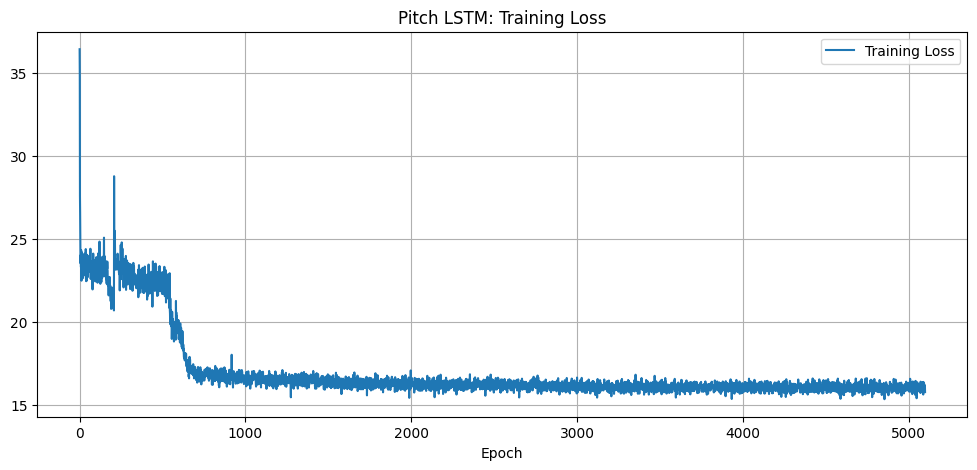

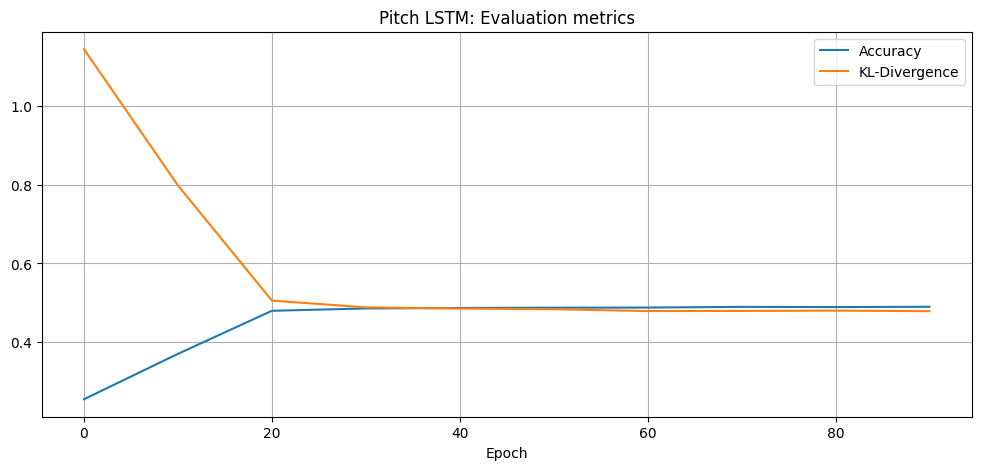

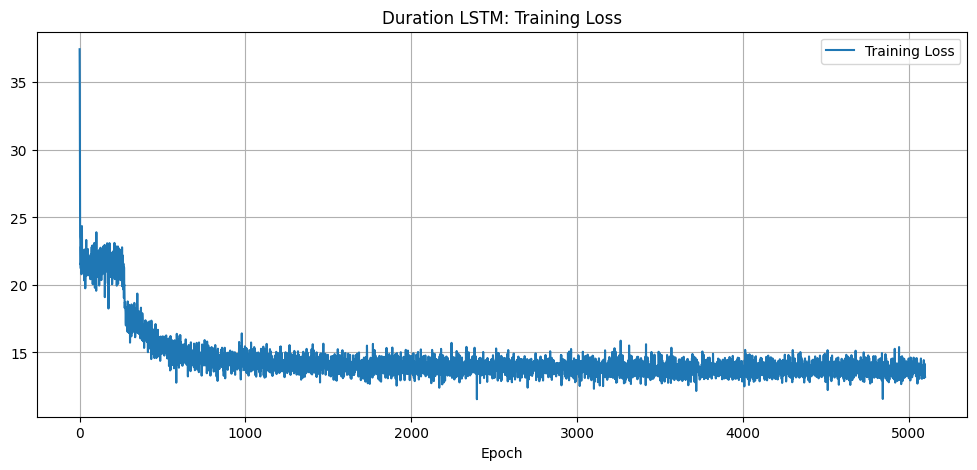

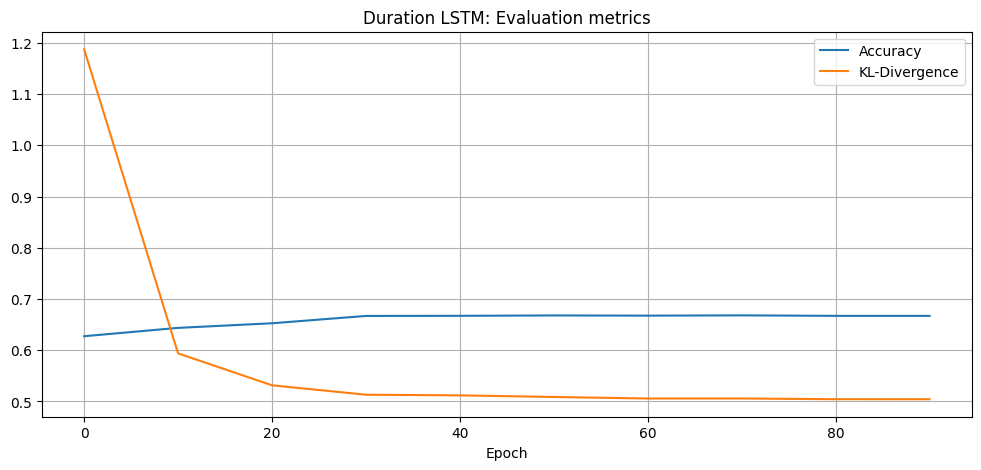

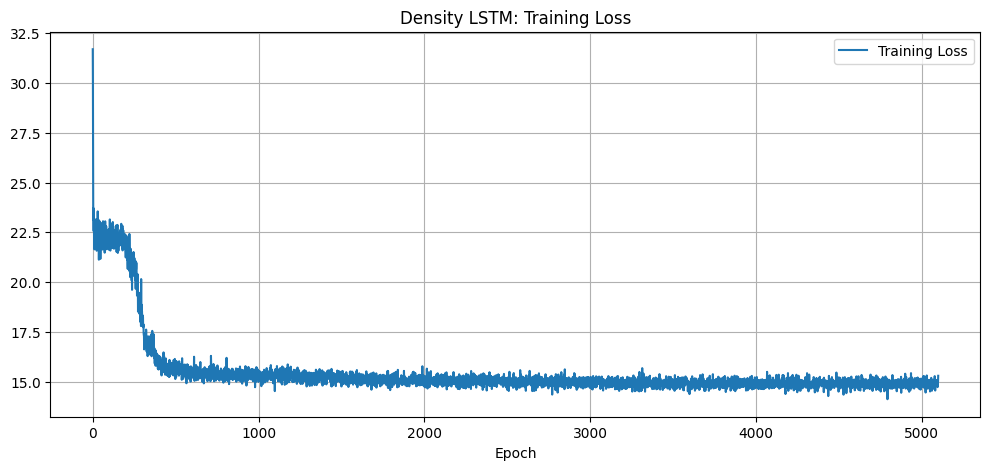

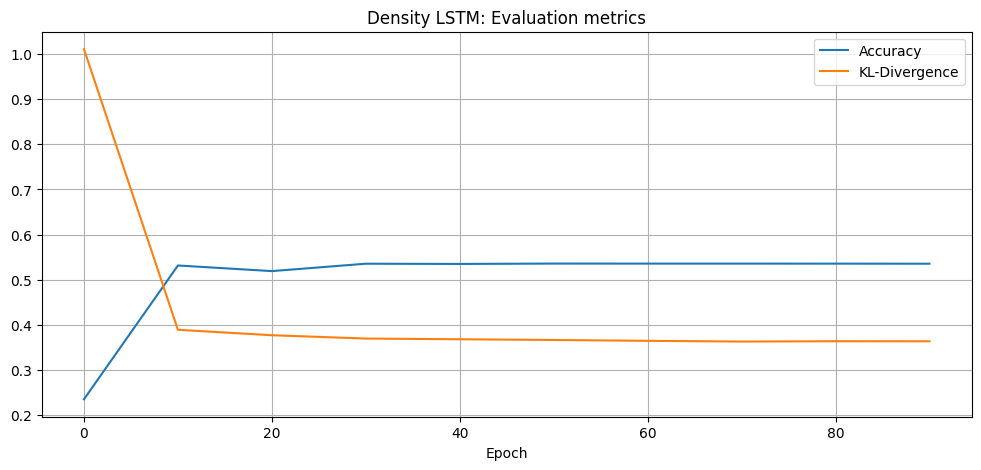

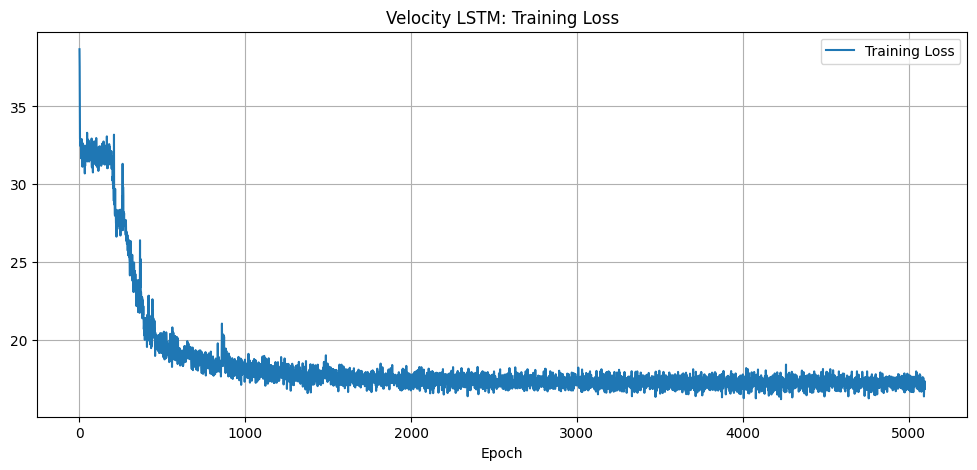

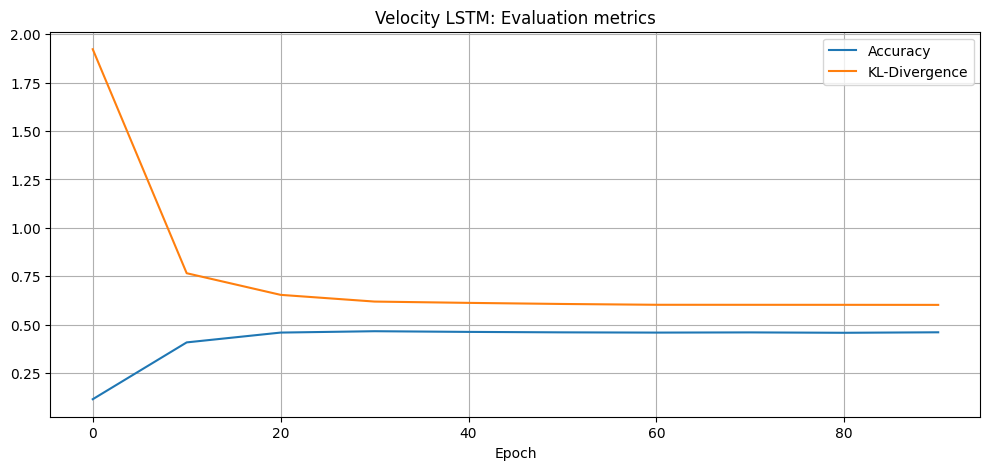

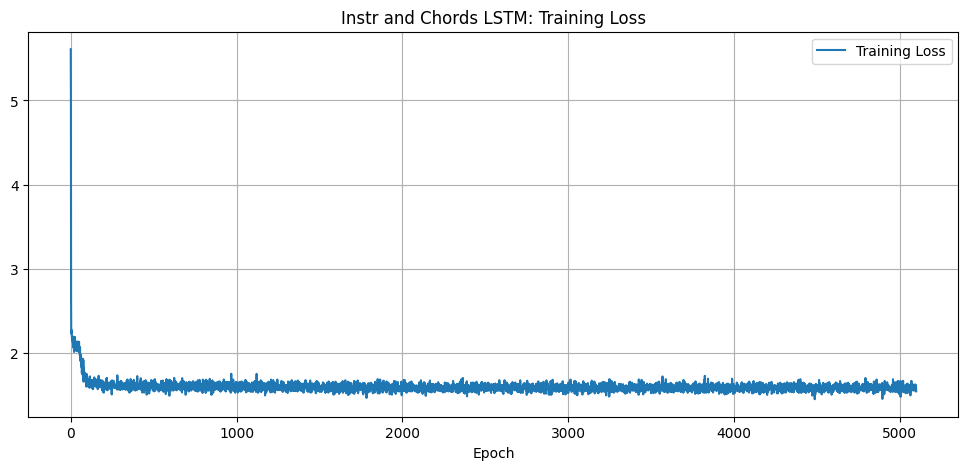

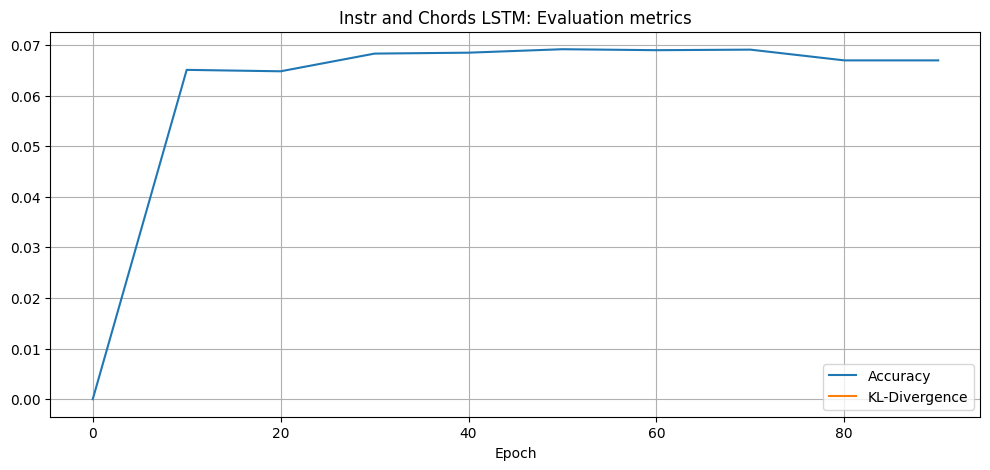

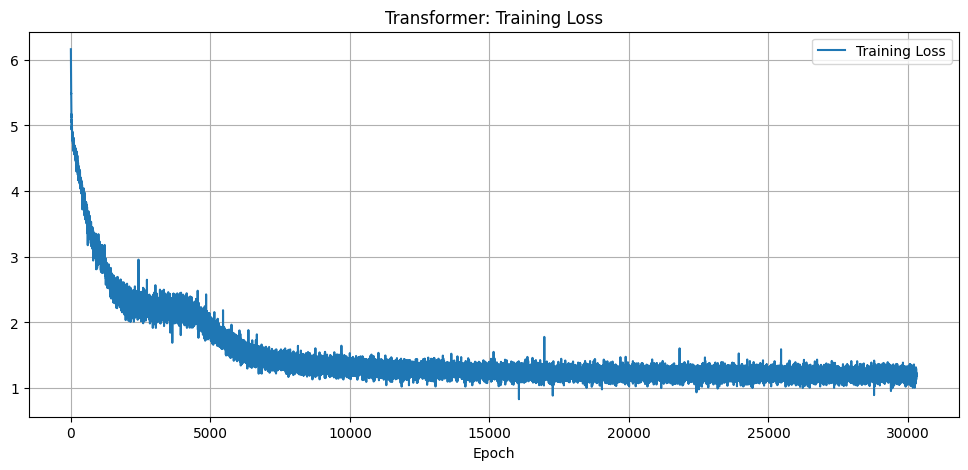

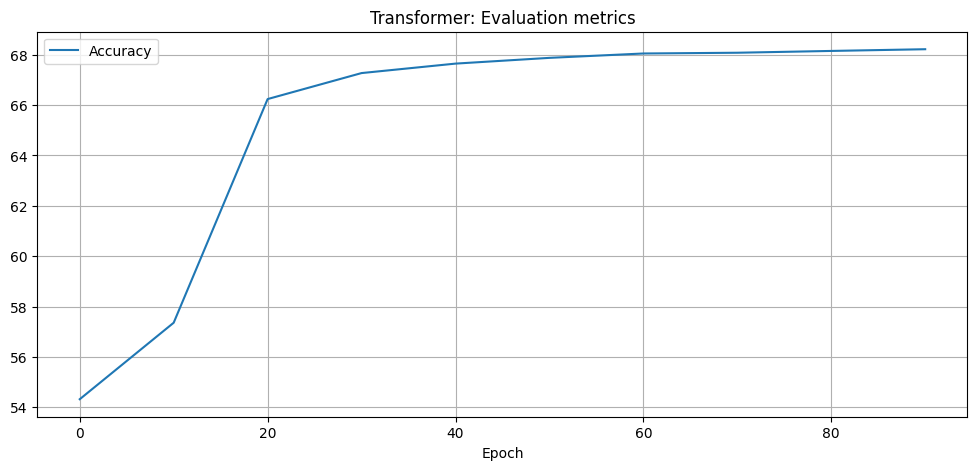

In [33]:
plot_metric("Pitch LSTM", get_json("pitch_lstm.json"))
plot_metric("Duration LSTM", get_json("duration_lstm.json"))
plot_metric("Density LSTM", get_json("density_lstm.json"))
plot_metric("Velocity LSTM", get_json("velocity_lstm.json"))
plot_metric("Instr and Chords LSTM", get_json("categorical_lstm.json"))
plot_metric("Transformer", get_json("transformer.json"))